In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [49]:
df= pd.read_csv('D:\THESIS WORK(indoorcoverage)\ThesisProject\data\data-3\RSSISensors_Large.csv')
df_m= pd.read_csv('D:\THESIS WORK(indoorcoverage)\ThesisProject\data\data-3\RSSISensors_Medium.csv')
df_S= pd.read_csv('D:\THESIS WORK(indoorcoverage)\ThesisProject\data\data-3\RSSISensors_Small.csv')

In [103]:
df.head()

,Unnamed: 0,r1,r2,r3,r4,x,y
0,0,0,32,59,87,0,1
1,1,25,32,63,49,2,1
2,2,83,46,46,25,4,1
3,3,39,42,52,32,6,1
4,4,46,32,32,39,8,1


In [50]:
# Clean column names and check for missing values
df.columns = df.columns.str.strip()
df = df.dropna()

# Separate features (RSSI values) and labels (coordinates)
X = df[['r1', 'r2', 'r3', 'r4']].values
y = df[['x', 'y']].values

# Normalize RSSI features (optional but recommended)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape for RNN input (samples, time steps, features)
X = X.reshape((X.shape[0], 2, 2))  # e.g., 2 time steps and 2 features

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Simple RNN model

In [51]:
# Simple RNN model
simple_rnn_model = Sequential([
    SimpleRNN(32, activation='relu', input_shape=(2, 2)),
    Dense(64, activation='relu'),
    Dense(2, activation='linear')  # Output x, y
])

# Compile
simple_rnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train
history_rnn = simple_rnn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/100


d:\THESIS WORK(indoorcoverage)\ThesisProject\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - loss: 72.1139 - val_loss: 93.9983
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 76.9649 - val_loss: 92.2394
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 67.5421 - val_loss: 90.4731
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 68.8907 - val_loss: 88.6529
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 67.7269 - val_loss: 86.7380
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 66.7444 - val_loss: 84.6881
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 65.0335 - val_loss: 82.4241
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 67.5083 - val_loss: 79.8415
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 63.0508 - val_loss: 76.9060
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 55.9326 - val_loss: 73.5658
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 54.8033 - val_loss: 69.7742
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 55.1

## LSTM model with Dropout and BatchNormalization

In [53]:
# LSTM model with Dropout and BatchNormalization
lstm_model = Sequential([
    LSTM(64, activation='tanh', return_sequences=False, input_shape=(2, 2)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(2, activation='linear')
])

# Compile
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train
history_lstm = lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - loss: 77.7514 - val_loss: 94.0857
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 77.5518 - val_loss: 93.5375
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 70.8906 - val_loss: 93.0205
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 68.6967 - val_loss: 92.4906
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 61.2052 - val_loss: 91.9329
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 59.2802 - val_loss: 91.3357
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 56.2562 - val_loss: 90.6905
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 56.5648 - val_loss: 89.9822
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 52.6613 - val_loss: 89.2173
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 47.1315 - val_loss: 88.3886
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 40.8419 - val_loss: 87.4890
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step 

In [ ]:
# Predict
y_pred_rnn = simple_rnn_model.predict(X_test)
y_pred_lstm = lstm_model.predict(X_test)

# RMSE
rmse_rnn = np.sqrt(mean_squared_error(y_test, y_pred_rnn))
rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred_lstm))
print(f"RMSE (Simple RNN): {rmse_rnn:.3f}")
print(f"RMSE (LSTM): {rmse_lstm:.3f}")

# Accuracy based on threshold distance (e.g., 6.5 units)
def compute_accuracy(y_true, y_pred, threshold=1.4):
    distances = np.linalg.norm(y_true - y_pred, axis=1)
    return np.mean(distances <= threshold) * 100

acc_rnn = compute_accuracy(y_test, y_pred_rnn)
acc_lstm = compute_accuracy(y_test, y_pred_lstm)
print(f"Accuracy (Simple RNN): {acc_rnn:.2f}%")
print(f"Accuracy (LSTM): {acc_lstm:.2f}%")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
RMSE (Simple RNN): 2.399
RMSE (LSTM): 3.828
Accuracy (Simple RNN): 97.44%
Accuracy (LSTM): 71.79%


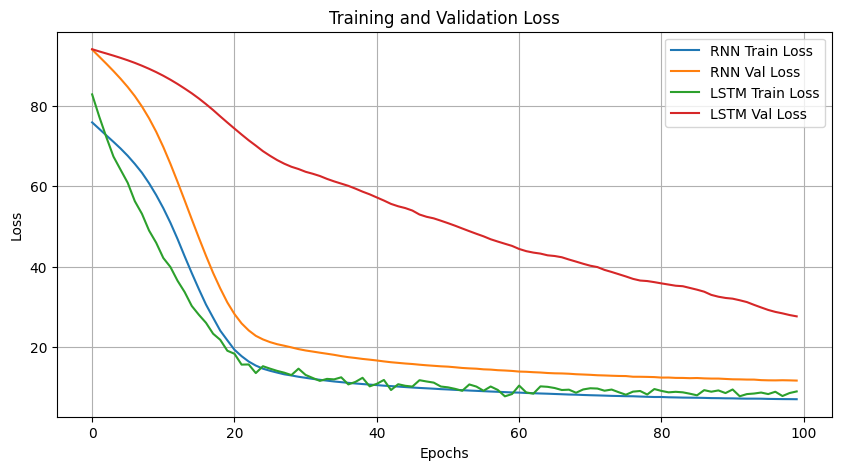

In [57]:
# Training & Validation Loss Plot
plt.figure(figsize=(10, 5))
plt.plot(history_rnn.history['loss'], label='RNN Train Loss')
plt.plot(history_rnn.history['val_loss'], label='RNN Val Loss')
plt.plot(history_lstm.history['loss'], label='LSTM Train Loss')
plt.plot(history_lstm.history['val_loss'], label='LSTM Val Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


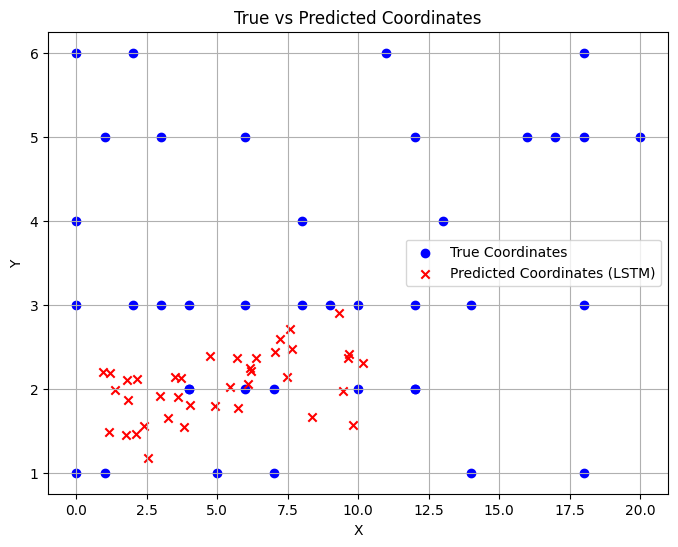

In [58]:

# Scatter Plot of True vs Predicted Coordinates (LSTM)
plt.figure(figsize=(8, 6))
plt.scatter(y_test[:, 0], y_test[:, 1], c='blue', label='True Coordinates')
plt.scatter(y_pred_lstm[:, 0], y_pred_lstm[:, 1], c='red', marker='x', label='Predicted Coordinates (LSTM)')
plt.title("True vs Predicted Coordinates")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

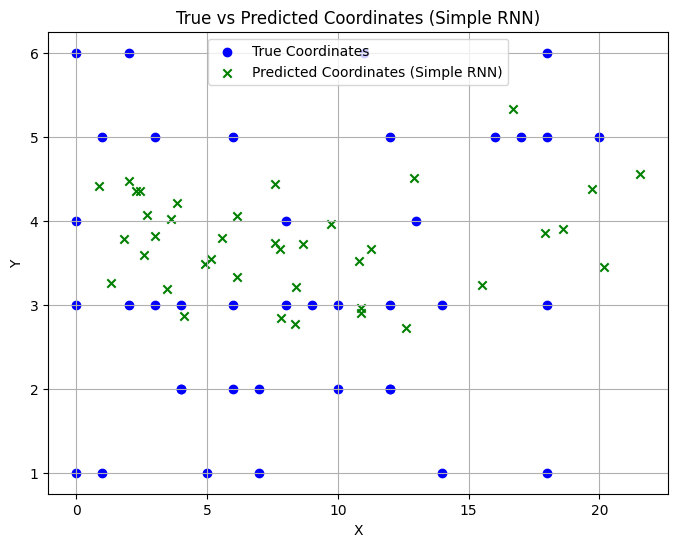

In [59]:
# Scatter Plot of True vs Predicted Coordinates (Simple RNN)
plt.figure(figsize=(8, 6))
plt.scatter(y_test[:, 0], y_test[:, 1], c='blue', label='True Coordinates')
plt.scatter(y_pred_rnn[:, 0], y_pred_rnn[:, 1], c='green', marker='x', label='Predicted Coordinates (Simple RNN)')
plt.title("True vs Predicted Coordinates (Simple RNN)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()


In [56]:
print(f"\n--- Performance Summary ---")
print(f"Simple RNN RMSE: {rmse_rnn:.3f}, Accuracy: {acc_rnn:.2f}%")
print(f"LSTM RMSE: {rmse_lstm:.3f}, Accuracy: {acc_lstm:.2f}%")



--- Performance Summary ---
Simple RNN RMSE: 2.399, Accuracy: 97.44%
LSTM RMSE: 3.828, Accuracy: 71.79%


## XGBOOST +GridCV


In [81]:
# Clean column names and check for missing values
df.columns = df.columns.str.strip()
df = df.dropna()

In [85]:
# Separate features (RSSI values) and labels (coordinates)
X = df[['r1', 'r2', 'r3', 'r4']].values
y1 = df[['x', 'y']].values

In [86]:
# Normalize RSSI features (optional but recommended)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1 = scaler.fit_transform(X)

In [87]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)


In [88]:
print(X_train.shape)  # Should be (num_samples, num_features), e.g. (1000, 4)
print(y_train.shape)  # Should be (num_samples, num_targets), e.g. (1000, 2)


(155, 4)
(155, 2)


In [91]:
param_grid = {
    'estimator__n_estimators': [100, 200],
    'estimator__max_depth': [3, 5, 7],
    'estimator__learning_rate': [0.01, 0.1],
    'estimator__subsample': [0.8, 1.0],
    'estimator__colsample_bytree': [0.8, 1.0]
}

base_model = xgb.XGBRegressor()
multi_model = MultiOutputRegressor(base_model)

grid_search = GridSearchCV(estimator=multi_model,
                           param_grid=param_grid,
                           cv=3,
                           scoring='neg_mean_squared_error',
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
print("Best Parameters (GridSearchCV):", grid_search.best_params_)
best_model_grid = grid_search.best_estimator_


# Extract best parameters for base model (remove 'estimator__' prefix)
best_params = {key.replace('estimator__', ''): value for key, value in grid_search.best_params_.items()}

# Train final model with best parameters
final_base_model = xgb.XGBRegressor(**best_params)
final_model = MultiOutputRegressor(final_base_model)
final_model.fit(X_train, y_train)

# Predict on test set
y_pred = final_model.predict(X_test)

# Evaluate errors for each target variable
for i in range(y_test.shape[1]):
    mse = mean_squared_error(y_test[:, i], y_pred[:, i])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test[:, i], y_pred[:, i])
    r2 = r2_score(y_test[:, i], y_pred[:, i])
    print(f"Target {i}: MSE={mse:.4f}, RMSE={rmse:.4f}, MAE={mae:.4f}, R2={r2:.4f}")

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters (GridSearchCV): {'estimator__colsample_bytree': 0.8, 'estimator__learning_rate': 0.01, 'estimator__max_depth': 3, 'estimator__n_estimators': 200, 'estimator__subsample': 1.0}
Target 0: MSE=7.7941, RMSE=2.7918, MAE=2.3060, R2=0.7838
Target 1: MSE=2.5040, RMSE=1.5824, MAE=1.3841, R2=0.0066


## RandomizedSearchCV + Xgboost

In [92]:
from scipy.stats import randint, uniform

param_dist = {
    'estimator__n_estimators': randint(100, 300),
    'estimator__max_depth': randint(3, 10),
    'estimator__learning_rate': uniform(0.01, 0.3),
    'estimator__subsample': uniform(0.7, 0.3),
    'estimator__colsample_bytree': uniform(0.7, 0.3)
}

base_model = xgb.XGBRegressor()
multi_model = MultiOutputRegressor(base_model)

random_search = RandomizedSearchCV(estimator=multi_model,
                                   param_distributions=param_dist,
                                   n_iter=30,
                                   cv=3,
                                   scoring='neg_mean_squared_error',
                                   verbose=1,
                                   random_state=42,
                                   n_jobs=-1)

random_search.fit(X_train, y_train)
print("Best Parameters (RandomizedSearchCV):", random_search.best_params_)
best_model_random = random_search.best_estimator_

# Extract best parameters for base model (remove 'estimator__' prefix)
best_params = {key.replace('estimator__', ''): value for key, value in grid_search.best_params_.items()}

# Train final model with best parameters
final_base_model = xgb.XGBRegressor(**best_params)
final_model = MultiOutputRegressor(final_base_model)
final_model.fit(X_train, y_train)

# Predict on test set
y_pred = final_model.predict(X_test)

# Evaluate errors for each target variable
for i in range(y_test.shape[1]):
    mse = mean_squared_error(y_test[:, i], y_pred[:, i])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test[:, i], y_pred[:, i])
    r2 = r2_score(y_test[:, i], y_pred[:, i])
    print(f"Target {i}: MSE={mse:.4f}, RMSE={rmse:.4f}, MAE={mae:.4f}, R2={r2:.4f}")

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Parameters (RandomizedSearchCV): {'estimator__colsample_bytree': np.float64(0.8834959481464842), 'estimator__learning_rate': np.float64(0.012119891565915222), 'estimator__max_depth': 3, 'estimator__n_estimators': 148, 'estimator__subsample': np.float64(0.8574323980775167)}
Target 0: MSE=7.7941, RMSE=2.7918, MAE=2.3060, R2=0.7838
Target 1: MSE=2.5040, RMSE=1.5824, MAE=1.3841, R2=0.0066


## LSTM + Hyper parameter Tuning

Trial 10 Complete [00h 00m 09s]
val_loss: 43.846981048583984

Best val_loss So Far: 36.394683837890625
Total elapsed time: 00h 01m 44s
Best hyperparameters:
LSTM units: 128
Dropout rate: 0.4
Dense units: 64
Learning rate: 0.01
Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 68.5270 - val_loss: 85.8236
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 27.7150 - val_loss: 69.5414
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 19.8333 - val_loss: 72.0916
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 11.1363 - val_loss: 76.6324
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 12.9885 - val_loss: 74.6144
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 11.3729 - val_loss: 66.6398
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 10.7592 - val_loss: 65.1036
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 10.3747 - val_loss: 68.4998
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 9.7306 - val_loss: 66.2465


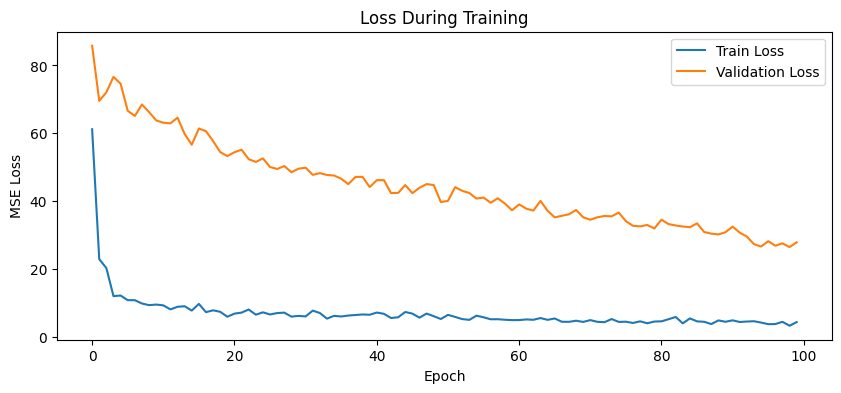

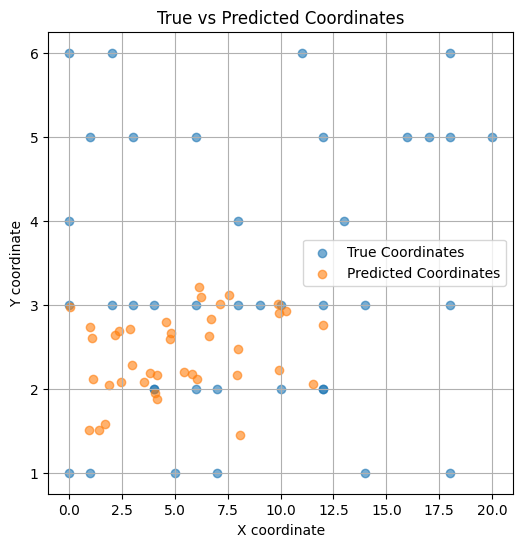

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt

# Load and preprocess data
df = pd.read_csv(r'D:\THESIS WORK(indoorcoverage)\ThesisProject\data\data-3\RSSISensors_Large.csv')
df.columns = df.columns.str.strip()
x = df[['r1', 'r2', 'r3', 'r4']].values
y = df[['x', 'y']].values

# Normalize
scaler = StandardScaler()
X = scaler.fit_transform(x)
X = X.reshape((X.shape[0], 2, 2))  # (samples, time steps, features)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Model builder for Keras Tuner
def build_model(hp):
    model = Sequential()
    model.add(
        LSTM(
            units=hp.Int('lstm_units', min_value=16, max_value=128, step=16),
            activation='relu',
            input_shape=(2, 2)
        )
    )
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout_rate', 0.1, 0.5, step=0.1)))
    model.add(Dense(
        units=hp.Int('dense_units', 32, 128, step=32),
        activation='relu'
    ))
    model.add(Dense(2))  # x and y
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mse'
    )
    return model

# Step 2: Tuning
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='lstm_tuner',
    project_name='rssi_localization'
)

tuner.search(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

# Step 3: Best hyperparameters
best_hp = tuner.get_best_hyperparameters(1)[0]
print("Best hyperparameters:")
print(f"LSTM units: {best_hp.get('lstm_units')}")
print(f"Dropout rate: {best_hp.get('dropout_rate')}")
print(f"Dense units: {best_hp.get('dense_units')}")
print(f"Learning rate: {best_hp.get('learning_rate')}")

# Step 4: Train model using best parameters
model = tuner.hypermodel.build(best_hp)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

# Step 5: Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
threshold = 6.5
distances = np.linalg.norm(y_test - y_pred, axis=1)
accuracy = np.mean(distances <= threshold)

print(f"\nTest MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Custom Accuracy (distance ≤ {threshold}): {accuracy*100:.2f}%")

# Step 6: Visualization
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(y_test[:, 0], y_test[:, 1], label='True Coordinates', alpha=0.6)
plt.scatter(y_pred[:, 0], y_pred[:, 1], label='Predicted Coordinates', alpha=0.6)
plt.title('True vs Predicted Coordinates')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.legend()
plt.grid(True)
plt.show()


## All Machine Learning Models

In [99]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
import warnings
warnings.filterwarnings('ignore')

# 1. Load data
df = pd.read_csv('D:/THESIS WORK(indoorcoverage)/ThesisProject/data/data-3/RSSISensors_Large.csv')
df.columns = df.columns.str.strip()
X = df[['r1', 'r2', 'r3', 'r4']].values
y = df[['x', 'y']].values

# 2. Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
# 4. Model configurations
models = {
    "Ridge": (Ridge(), {'estimator__alpha': [0.1, 1.0, 10.0]}),
    "Lasso": (Lasso(), {'estimator__alpha': [0.001, 0.01, 0.1, 1.0]}),
    "SVR": (SVR(), {'estimator__C': [1, 10], 'estimator__kernel': ['rbf', 'linear']}),
    "RandomForest": (RandomForestRegressor(), {'estimator__n_estimators': [100, 200]}),
    "GradientBoosting": (GradientBoostingRegressor(), {'estimator__n_estimators': [100], 'estimator__learning_rate': [0.1, 0.05]}),
    "KNN": (KNeighborsRegressor(), {'estimator__n_neighbors': [3, 5, 7]}),
    "XGBoost": (XGBRegressor(verbosity=0), {'estimator__n_estimators': [100], 'estimator__max_depth': [3, 5]})
}


# 5. Evaluation
def evaluate_model(name, model, params):
    print(f"\n🔍 Tuning and Evaluating: {name}")
    grid = GridSearchCV(MultiOutputRegressor(model), params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Best Params: {grid.best_params_}")
    print(f"MSE:  {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE:  {mae:.4f}")
    print(f"R²:   {r2:.4f}")
    return {
        "Model": name,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2,
        "Best Params": grid.best_params_
    }

# 6. Run all models
results = []
for name, (model, params) in models.items():
    results.append(evaluate_model(name, model, params))

# 7. Summary Table
results_df = pd.DataFrame(results)
print("\n📊 Summary of Results:")
print(results_df.sort_values(by="RMSE"))


🔍 Tuning and Evaluating: Ridge
Best Params: {'estimator__alpha': 10.0}
MSE:  5.8737
RMSE: 2.4236
MAE:  1.9585
R²:   0.4105

🔍 Tuning and Evaluating: Lasso
Best Params: {'estimator__alpha': 0.1}
MSE:  5.9552
RMSE: 2.4403
MAE:  1.9891
R²:   0.3728

🔍 Tuning and Evaluating: SVR
Best Params: {'estimator__C': 1, 'estimator__kernel': 'linear'}
MSE:  6.1120
RMSE: 2.4722
MAE:  1.9165
R²:   0.4147

🔍 Tuning and Evaluating: RandomForest
Best Params: {'estimator__n_estimators': 100}
MSE:  5.2597
RMSE: 2.2934
MAE:  1.7938
R²:   0.3223

🔍 Tuning and Evaluating: GradientBoosting
Best Params: {'estimator__learning_rate': 0.05, 'estimator__n_estimators': 100}
MSE:  4.8727
RMSE: 2.2074
MAE:  1.7111
R²:   0.3378

🔍 Tuning and Evaluating: KNN
Best Params: {'estimator__n_neighbors': 7}
MSE:  5.3496
RMSE: 2.3129
MAE:  1.8388
R²:   0.4003

🔍 Tuning and Evaluating: XGBoost
Best Params: {'estimator__max_depth': 5, 'estimator__n_estimators': 100}
MSE:  9.6140
RMSE: 3.1006
MAE:  2.3562
R²:   -0.0072

📊 Summary

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 1. Load data
df = pd.read_csv('D:/THESIS WORK(indoorcoverage)/ThesisProject/data/data-3/RSSISensors_Large.csv')
df.columns = df.columns.str.strip()
X = df[['r1', 'r2', 'r3', 'r4']].values
y = df[['x', 'y']].values

# # 2. Normalize features
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# Normalize
scaler_x = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y)

# Reshape for sequence models
X_seq = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_scaled, test_size=0.2, random_state=42)


In [106]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout

def build_bilstm():
    model = Sequential([
        Bidirectional(LSTM(64, return_sequences=False), input_shape=(4, 1)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(2)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model


In [107]:
from tensorflow.keras.layers import Input, Dense, LayerNormalization, MultiHeadAttention, GlobalAveragePooling1D
from tensorflow.keras.models import Model

def build_transformer():
    inputs = Input(shape=(4, 1))
    x = Dense(64)(inputs)
    attn = MultiHeadAttention(num_heads=2, key_dim=32)(x, x)
    x = LayerNormalization()(x + attn)
    x = GlobalAveragePooling1D()(x)
    x = Dense(32, activation='relu')(x)
    outputs = Dense(2)(x)
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model


In [108]:
from tcn import TCN

def build_tcn():
    model = Sequential([
        TCN(input_shape=(4, 1)),
        Dense(2)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model


In [109]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D

def build_cnn_lstm():
    model = Sequential([
        Conv1D(64, 2, activation='relu', input_shape=(4, 1)),
        MaxPooling1D(),
        LSTM(64),
        Dense(32, activation='relu'),
        Dense(2)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model


In [110]:
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor

def train_xgboost(X_train_flat, y_train):
    model = MultiOutputRegressor(XGBRegressor(n_estimators=100))
    model.fit(X_train_flat, y_train)
    return model


In [111]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

def evaluate_dl_model(model, X_train, y_train, X_test, y_test, name):
    history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test), verbose=0)
    y_pred = model.predict(X_test)
    
    # Inverse scaling
    y_test_inv = scaler_y.inverse_transform(y_test)
    y_pred_inv = scaler_y.inverse_transform(y_pred)

    mse = mean_squared_error(y_test_inv, y_pred_inv)
    mae = mean_absolute_error(y_test_inv, y_pred_inv)
    r2 = r2_score(y_test_inv, y_pred_inv)

    # Plot loss
    plt.figure(figsize=(6,4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f"{name} Loss Curve")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    return {"Model": name, "MSE": mse, "MAE": mae, "R2": r2}


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 390ms/step


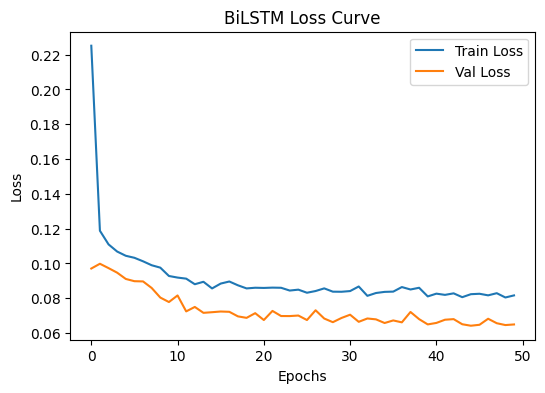

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


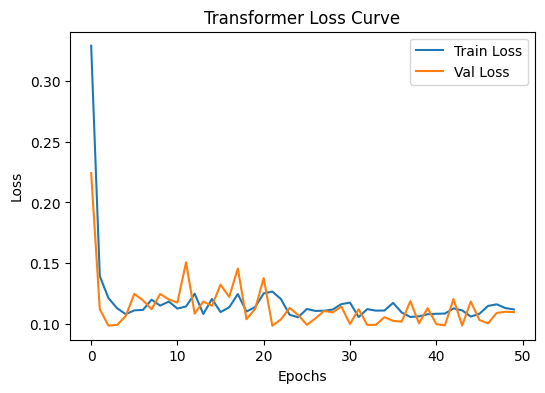

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 487ms/step


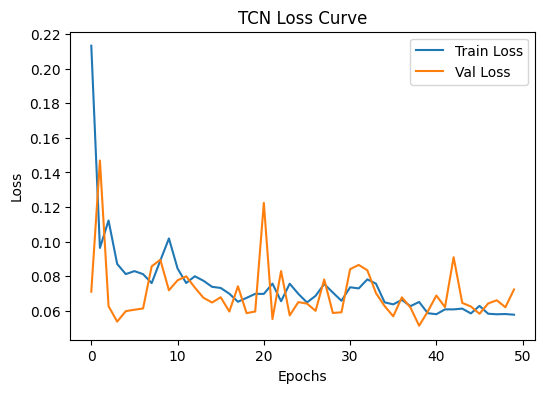

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


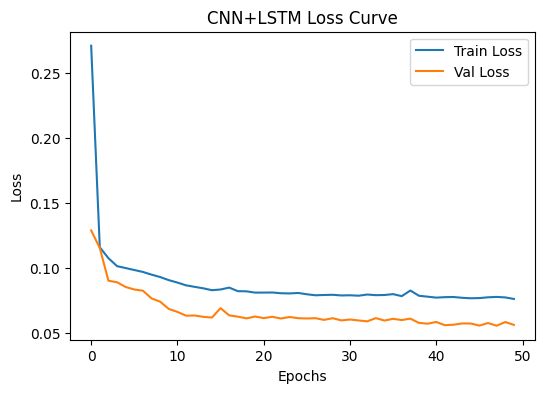

In [112]:
results = []

# BiLSTM
bilstm_model = build_bilstm()
results.append(evaluate_dl_model(bilstm_model, X_train, y_train, X_test, y_test, "BiLSTM"))

# Transformer
transformer_model = build_transformer()
results.append(evaluate_dl_model(transformer_model, X_train, y_train, X_test, y_test, "Transformer"))

# TCN
tcn_model = build_tcn()
results.append(evaluate_dl_model(tcn_model, X_train, y_train, X_test, y_test, "TCN"))

# CNN + LSTM
cnn_lstm_model = build_cnn_lstm()
results.append(evaluate_dl_model(cnn_lstm_model, X_train, y_train, X_test, y_test, "CNN+LSTM"))


In [113]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

xgb_model = train_xgboost(X_train_flat, y_train)
y_pred = xgb_model.predict(X_test_flat)
y_pred_inv = scaler_y.inverse_transform(y_pred)
y_test_inv = scaler_y.inverse_transform(y_test)

mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
r2 = r2_score(y_test_inv, y_pred_inv)

results.append({"Model": "XGBoost", "MSE": mse, "MAE": mae, "R2": r2})


         Model        MSE       MAE        R2
3     CNN+LSTM   4.969446  1.796900  0.428432
0       BiLSTM   6.873438  2.050269  0.339765
2          TCN   7.799316  2.260037  0.262818
4      XGBoost   9.154084  2.331349 -0.009663
1  Transformer  24.067617  3.562576 -0.155160


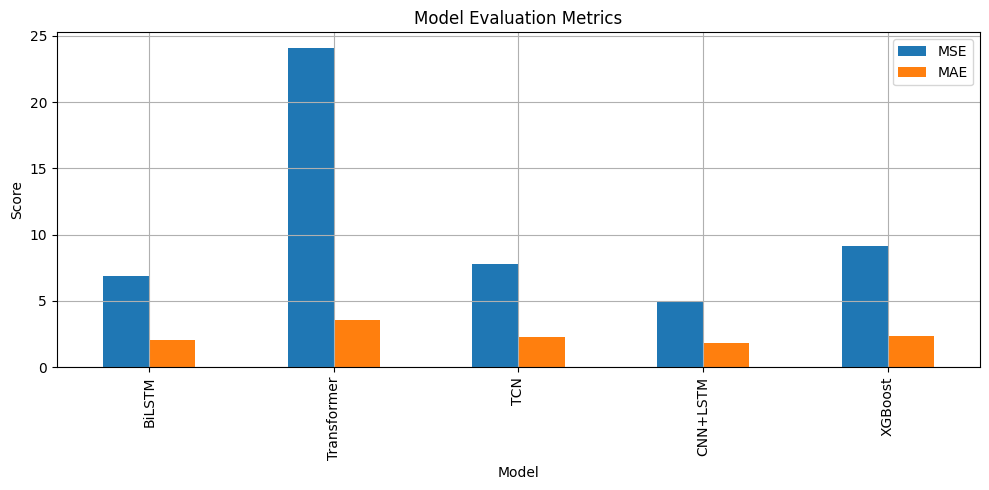

In [114]:
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='MSE'))

# Plot comparison
results_df.set_index('Model')[['MSE', 'MAE']].plot(kind='bar', figsize=(10, 5), title="Model Evaluation Metrics")
plt.ylabel("Score")
plt.grid(True)
plt.tight_layout()
plt.show()


In [115]:
# rssi_models_pipeline.py

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Deep learning libraries
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, LSTM, Bidirectional, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.layers import TimeDistributed, GlobalAveragePooling1D
from tensorflow.keras.callbacks import EarlyStopping

# Other models
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor

# 1. Load data
df = pd.read_csv('D:/THESIS WORK(indoorcoverage)/ThesisProject/data/data-3/RSSISensors_Large.csv')
df.columns = df.columns.str.strip()
X = df[['r1', 'r2', 'r3', 'r4']].values
y = df[['x', 'y']].values

X_seq = X.reshape((X.shape[0], 1, X.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(X_seq, y, test_size=0.2, random_state=42)



In [116]:
# Store results
results = []

# 2. Utility functions
def evaluate_model(y_true, y_pred, name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    results.append({"Model": name, "MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2})
    return mse, rmse, mae, r2

# 3. Bidirectional LSTM
bi_lstm = Sequential([
    Bidirectional(LSTM(64, return_sequences=False)),
    Dense(64, activation='relu'),
    Dense(2)
])
bi_lstm.compile(optimizer='adam', loss='mse', metrics=['mae'])
bi_lstm.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=0)
y_pred = bi_lstm.predict(X_test)
evaluate_model(y_test, y_pred, "BiLSTM")

# 4. Transformer (simplified)
from tensorflow.keras.layers import LayerNormalization, MultiHeadAttention, Embedding, Add

input_ = Input(shape=(1, 4))
x = Dense(64)(input_)
x = MultiHeadAttention(num_heads=2, key_dim=4)(x, x)
x = LayerNormalization()(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
output = Dense(2)(x)
transformer = Model(inputs=input_, outputs=output)
transformer.compile(optimizer='adam', loss='mse', metrics=['mae'])
transformer.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=0)
y_pred = transformer.predict(X_test)
evaluate_model(y_test, y_pred, "Transformer")

# 5. TCN (Temporal Convolutional Network)
from tcn import TCN

tcn = Sequential([
    TCN(64, kernel_size=2, dilations=[1, 2, 4]),
    Dense(32, activation='relu'),
    Dense(2)
])
tcn.compile(optimizer='adam', loss='mse', metrics=['mae'])
tcn.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=0)
y_pred = tcn.predict(X_test)
evaluate_model(y_test, y_pred, "TCN")

# 6. CNN + LSTM
cnn_lstm = Sequential([
    TimeDistributed(Conv1D(64, kernel_size=1, activation='relu'), input_shape=(1, 4, 1)),
    TimeDistributed(MaxPooling1D(1)),
    TimeDistributed(Flatten()),
    LSTM(64),
    Dense(32, activation='relu'),
    Dense(2)
])
X_train_cnn = X_train.reshape((X_train.shape[0], 1, 4, 1))
X_test_cnn = X_test.reshape((X_test.shape[0], 1, 4, 1))
cnn_lstm.compile(optimizer='adam', loss='mse', metrics=['mae'])
cnn_lstm.fit(X_train_cnn, y_train, epochs=50, validation_split=0.2, verbose=0)
y_pred = cnn_lstm.predict(X_test_cnn)
evaluate_model(y_test, y_pred, "CNN + LSTM")

# 7. XGBoost
X_flat = X_seq.reshape((X_seq.shape[0], X_seq.shape[2]))
X_train_flat, X_test_flat = train_test_split(X_flat, test_size=0.2, random_state=42)
xgb = MultiOutputRegressor(XGBRegressor())
xgb.fit(X_train_flat, y_train)
y_pred = xgb.predict(X_test_flat)
evaluate_model(y_test, y_pred, "XGBoost")

# 8. Autoencoder + Regression
inp = Input(shape=(1, 4))
encoded = LSTM(32)(inp)
reg_out = Dense(2)(encoded)
auto_reg = Model(inp, reg_out)
auto_reg.compile(optimizer='adam', loss='mse', metrics=['mae'])
auto_reg.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=0)
y_pred = auto_reg.predict(X_test)
evaluate_model(y_test, y_pred, "Autoencoder + Regression")

# (Optional) 9. Ensemble
# Simple average of top 3 models
bi_preds = bi_lstm.predict(X_test)
tcn_preds = tcn.predict(X_test)
xgb_preds = xgb.predict(X_test_flat)
ensemble_avg = (bi_preds + tcn_preds + xgb_preds) / 3
evaluate_model(y_test, ensemble_avg, "Ensemble Avg")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 401ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 288ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 368ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 285ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


(5.951385498046875,
 np.float64(2.4395461664102354),
 1.8674137592315674,
 0.39577391743659973)

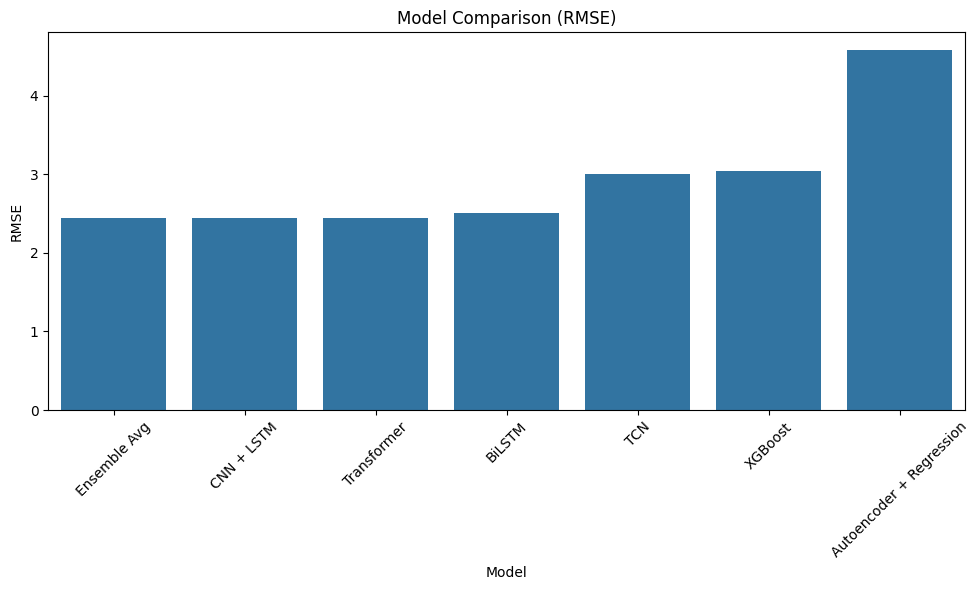


📊 Summary:
                      Model        MSE      RMSE       MAE        R2
6              Ensemble Avg   5.951385  2.439546  1.867414  0.395774
3                CNN + LSTM   5.962277  2.441777  2.025226  0.375697
1               Transformer   5.995360  2.448543  2.000117  0.366287
0                    BiLSTM   6.290249  2.508037  2.030110  0.371368
2                       TCN   9.036426  3.006065  2.373150 -0.071708
4                   XGBoost   9.258417  3.042765  2.343839 -0.010631
5  Autoencoder + Regression  20.931965  4.575146  3.217034 -0.119329


In [117]:
# 10. Plot Results
results_df = pd.DataFrame(results)
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.sort_values("RMSE"), x="Model", y="RMSE")
plt.title("Model Comparison (RMSE)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print Summary
print("\n📊 Summary:")
print(results_df.sort_values("RMSE"))

In [125]:
import pandas as pd
import os
import glob

# Set your folder path
folder_path = r'D:\WiFi-RSSI-Localization-Dataset-main\RSS'

# Create column names: r1 to r27
column_names = [f"r{i}" for i in range(1, 28)]

# Get all CSV files in the folder
csv_files = sorted(glob.glob(os.path.join(folder_path, "*.csv")))
print(f"Found {len(csv_files)} CSV files.")

dataframes = []

# Read each file, assign column names, and store in list
for file in csv_files:
    try:
        df = pd.read_csv(file, header=None)  # Read without header
        df.columns = column_names            # Assign r1 to r27
        print(f"Processed {file} with shape {df.shape}")
        dataframes.append(df)

        # Optional: overwrite original file with column names
        # df.to_csv(file, index=False)

    except Exception as e:
        print(f"Error reading {file}: {e}")

# Merge and save
if dataframes:
    merged_df = pd.concat(dataframes, ignore_index=True)
    merged_df.to_csv('merged.csv', index=False)
    print("✅ Merged and saved to 'merged.csv'")
else:
    print("❌ No files were read successfully.")


Found 250 CSV files.
Processed D:\WiFi-RSSI-Localization-Dataset-main\RSS\1.csv with shape (75, 27)
Processed D:\WiFi-RSSI-Localization-Dataset-main\RSS\10.csv with shape (75, 27)
Processed D:\WiFi-RSSI-Localization-Dataset-main\RSS\100.csv with shape (75, 27)
Processed D:\WiFi-RSSI-Localization-Dataset-main\RSS\101.csv with shape (75, 27)
Processed D:\WiFi-RSSI-Localization-Dataset-main\RSS\102.csv with shape (75, 27)
Processed D:\WiFi-RSSI-Localization-Dataset-main\RSS\103.csv with shape (75, 27)
Processed D:\WiFi-RSSI-Localization-Dataset-main\RSS\104.csv with shape (75, 27)
Processed D:\WiFi-RSSI-Localization-Dataset-main\RSS\105.csv with shape (75, 27)
Processed D:\WiFi-RSSI-Localization-Dataset-main\RSS\106.csv with shape (75, 27)
Processed D:\WiFi-RSSI-Localization-Dataset-main\RSS\107.csv with shape (75, 27)
Processed D:\WiFi-RSSI-Localization-Dataset-main\RSS\108.csv with shape (75, 27)
Processed D:\WiFi-RSSI-Localization-Dataset-main\RSS\109.csv with shape (75, 27)
Processed 

In [134]:
import pandas as pd
import os
import glob

# Set your folder path
folder_path = r'D:\WiFi-RSSI-Localization-Dataset-main\xyz'

# Create column names: r1 to r3
column_names = [f"c{i}" for i in range(1, 4)]

# Get all CSV files in the folder
csv_files = sorted(glob.glob(os.path.join(folder_path, "*.csv")))
print(f"Found {len(csv_files)} CSV files.")

dataframes = []

# Read each file, assign column names, and store in list
for file in csv_files:
    try:
        df = pd.read_csv(file, header=None)  # Read without header
        df.columns = column_names            # Assign r1 to r27
        print(f"Processed {file} with shape {df.shape}")
        dataframes.append(df)

        # Optional: overwrite original file with column names
        # df.to_csv(file, index=False)

    except Exception as e:
        print(f"Error reading {file}: {e}")

# Merge and save
if dataframes:
    merged_df = pd.concat(dataframes, ignore_index=True)
    merged_df.to_csv('xyzmerged.csv', index=False)
    print("✅ Merged and saved to 'merged.csv'")
else:
    print("❌ No files were read successfully.")

Found 250 CSV files.
Processed D:\WiFi-RSSI-Localization-Dataset-main\xyz\1.csv with shape (1, 3)
Processed D:\WiFi-RSSI-Localization-Dataset-main\xyz\10.csv with shape (1, 3)
Processed D:\WiFi-RSSI-Localization-Dataset-main\xyz\100.csv with shape (1, 3)
Processed D:\WiFi-RSSI-Localization-Dataset-main\xyz\101.csv with shape (1, 3)
Processed D:\WiFi-RSSI-Localization-Dataset-main\xyz\102.csv with shape (1, 3)
Processed D:\WiFi-RSSI-Localization-Dataset-main\xyz\103.csv with shape (1, 3)
Processed D:\WiFi-RSSI-Localization-Dataset-main\xyz\104.csv with shape (1, 3)
Processed D:\WiFi-RSSI-Localization-Dataset-main\xyz\105.csv with shape (1, 3)
Processed D:\WiFi-RSSI-Localization-Dataset-main\xyz\106.csv with shape (1, 3)
Processed D:\WiFi-RSSI-Localization-Dataset-main\xyz\107.csv with shape (1, 3)
Processed D:\WiFi-RSSI-Localization-Dataset-main\xyz\108.csv with shape (1, 3)
Processed D:\WiFi-RSSI-Localization-Dataset-main\xyz\109.csv with shape (1, 3)
Processed D:\WiFi-RSSI-Localizatio

In [132]:
import pandas as pd

# Load your original CSV file (with 3 columns and ~250 rows)
df = pd.read_csv(r"D:\THESIS WORK(indoorcoverage)\ThesisProject\xyz-merged.csv")  # Replace with your actual filename

# Create an empty row with NaNs for all columns
empty_row = pd.DataFrame([[None] * df.shape[1]], columns=df.columns)

# Output list to hold rows and empty blocks
expanded_rows = []

# Add each row from original data followed by 75 empty rows
for index, row in df.iterrows():
    expanded_rows.append(row.to_frame().T)  # Add actual data row
    if index != len(df) - 1:  # Avoid adding empty rows after the last data row
        expanded_rows.extend([empty_row] * 74)  # Add 75 empty rows

# Concatenate everything
expanded_df = pd.concat(expanded_rows, ignore_index=True)

# Save to new CSV
expanded_df.to_csv("expanded_with_empty_rows.csv", index=False)

print("✅ CSV file with 75 empty rows inserted between each entry saved as 'expanded_with_empty_rows.csv'")


✅ CSV file with 75 empty rows inserted between each entry saved as 'expanded_with_empty_rows.csv'


In [133]:
import pandas as pd

# Load the original CSV
df = pd.read_csv(r"D:\THESIS WORK(indoorcoverage)\ThesisProject\xyz-merged.csv")  # Replace with your actual CSV filename

# Number of repeated rows between each actual row
num_repeat = 74

# List to hold the new expanded rows
expanded_rows = []

for i in range(len(df)):
    # Add current row
    expanded_rows.append(df.iloc[i])
    
    # If not the last row, repeat the *next* row 74 times
    if i + 1 < len(df):
        repeated_row = df.iloc[i + 1]
        for _ in range(num_repeat):
            expanded_rows.append(repeated_row)

# Create DataFrame from the list of Series
expanded_df = pd.DataFrame(expanded_rows)

# Save to CSV
expanded_df.to_csv("filled_with_next_repeated_rows.csv", index=False)

print("✅ CSV saved as 'filled_with_next_repeated_rows.csv' with 74 rows repeated from the next entry.")


✅ CSV saved as 'filled_with_next_repeated_rows.csv' with 74 rows repeated from the next entry.
